# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Jason Sinar Isac Saputra
- **Email:** isacsaputraaa@gmail.com
- **ID Dicoding:** MS081D5Y0488


## Menentukan Pertanyaan Bisnis


- Bagaimana progres harian penyewaan sepeda dari tahun 2011 hingga tahun 2013?

- Suhu seperti apa yang membuat para pelanggan bersemangat untuk bersepeda menyewa sepeda dari kita?

## Import Semua Packages/Library yang Digunakan

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [34]:
from google.colab import files
uploaded = files.upload()
another = files.upload()

Saving day.csv to day (1).csv


Saving hour.csv to hour (1).csv


In [35]:
data_hari = pd.read_csv('day.csv')
data_jam = pd.read_csv('hour.csv')

### Assessing Data

In [36]:
data_hari.isnull().sum()
data_hari.duplicated().sum()
data_jam.isnull().sum()
data_jam.duplicated().sum()

0

**Insight:**
- mengidentifikasi apakah ada nilai kosong pada dataset
- mengidentifikasi apakah ada nilai ganda pada dataset

### Cleaning Data

In [37]:
data_hari.drop(columns=['instant'], inplace=True)
data_jam.drop(columns=['instant'], inplace=True)

**Insight:**
- Menghapus kolom yang tidak diperlukan


## Exploratory Data Analysis (EDA)

### Explore ...

In [43]:
deskripsi_hari = data_hari.describe()
deskripsi_jam = data_jam.describe()
print(deskripsi_hari)
print(deskripsi_jam)

           season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.183051    0.162961    0.142429    0.0774

**Insight:**
- mendeskripsikan data


In [44]:
#menyimpan dataset yang sudah dibersihkan
data_hari.to_csv("cleaned_day.csv", index=False)
data_jam.to_csv("cleaned_hour.csv", index=False)

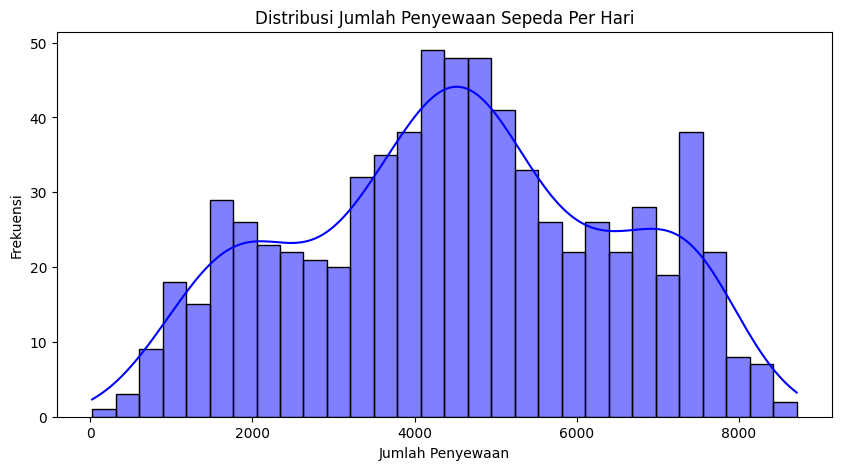

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(data_hari['cnt'], bins=30, kde=True, color='blue')
plt.title("Distribusi Jumlah Penyewaan Sepeda Per Hari")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

- Visualisasi statistik jumlah penyewaan sepeda per hari

## Visualization & Explanatory Analysis

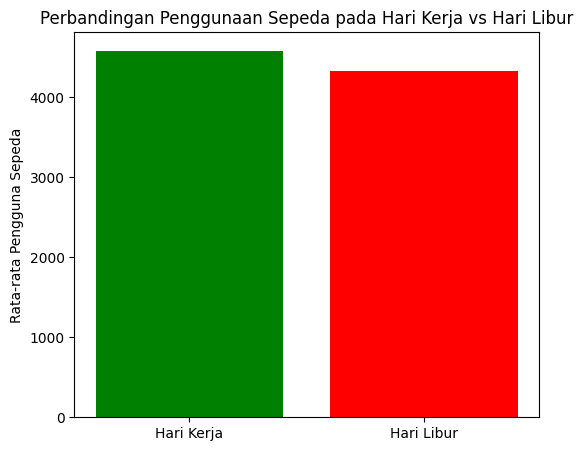

In [53]:
avg_workingday = data_hari[data_hari['workingday'] == 1]['cnt'].mean()
avg_non_workingday = data_hari[data_hari['workingday'] == 0]['cnt'].mean()
plt.figure(figsize=(6, 5))
plt.bar(['Hari Kerja', 'Hari Libur'], [avg_workingday, avg_non_workingday], color=['green', 'red'])
plt.ylabel("Rata-rata Pengguna Sepeda")
plt.title("Perbandingan Penggunaan Sepeda pada Hari Kerja vs Hari Libur")
plt.show()

### Bagaimana progres harian penyewaan sepeda dari tahun ke tahun? :

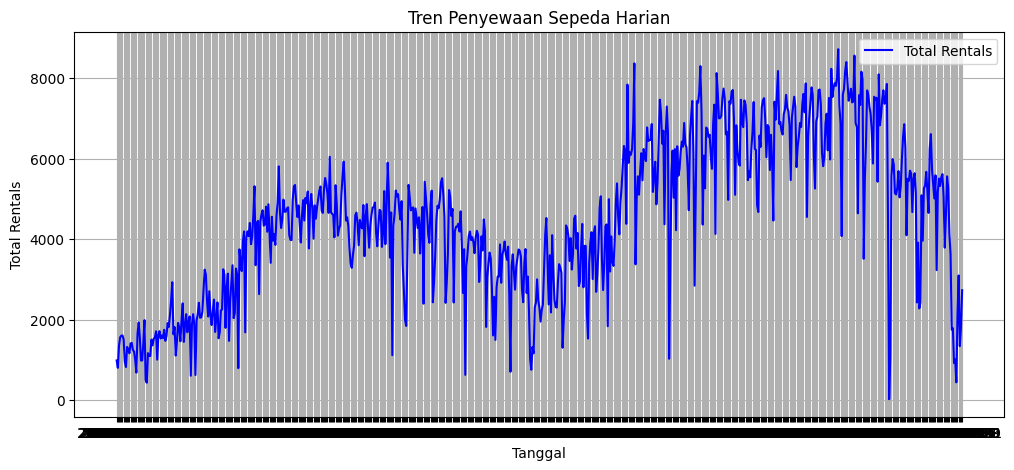

In [54]:
plt.figure(figsize=(12, 5))
plt.plot(data_hari['dteday'], data_hari['cnt'], label="Total Rentals", color='b')
plt.xlabel("Tanggal")
plt.ylabel("Total Rentals")
plt.title("Tren Penyewaan Sepeda Harian")
plt.legend()
plt.grid(True)
plt.show()

### Suhu seperti apa yang membuat para pelanggan bersemangat untuk bersepeda menyewa sepeda dari kita? :

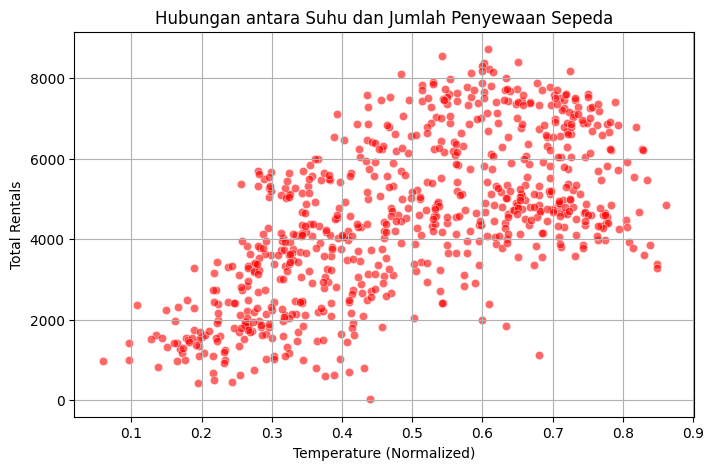

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_hari['temp'], y=data_hari['cnt'], alpha=0.6, color='red')
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Total Rentals")
plt.title("Hubungan antara Suhu dan Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()

## Kesimpulan pertanyaan 1

- 1. Tren Umum Meningkat: Terlihat adanya peningkatan jumlah penyewaan sepeda seiring berjalannya waktu, terutama dari tahun 2011 ke 2012.
- 2. Lonjakan dan Penurunan Sesekali: Ada beberapa titik dengan penurunan tajam yang bisa disebabkan oleh faktor seperti cuaca ekstrem atau hari libur.

## Kesimpulan Pertanyaan 2

- 1. Ada pola naik dan turun yang kemungkinan besar berkaitan dengan musim—misalnya, jumlah penyewaan mungkin lebih tinggi saat musim panas dan lebih rendah di musim dingin.
- 2. Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda. Hal ini masuk akal karena orang lebih cenderung menggunakan sepeda saat cuaca lebih hangat.
- 3. Setelah mencapai suhu tertentu (mendekati nilai 1 dalam skala normalisasi), jumlah penyewaan cenderung tidak meningkat lebih jauh, mungkin karena suhu yang terlalu panas tidak nyaman untuk bersepeda.